In [333]:
# Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import scipy as stats

In [244]:
plt.rcParams['figure.figsize'] = (10,5)

In [9]:
# Loading the Dataset
credits = pd.read_csv('.\\archive\\credits.csv')
Keywords = pd.read_csv('.\\archive\\keywords.csv')
#links = pd.read_csv('links.csv')
# links_small = pd.read_csv('Dataset/links_small.csv') same as links
movies_metadata = pd.read_csv('.\\archive\\movies_metadata.csv')
ratings = pd.read_csv('.\\archive\\ratings.csv')
# ratings_small = pd.read_csv('Dataset/ratings_small.csv') same as ratings

In [10]:
credits.shape

(45476, 3)

In [11]:
credits.head(2)
# columns : cast , crew , id(given from tmbd)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


In [12]:
credits.iloc[0]['cast']
# columns : cast_id , character , credit_id , gender , id(given from tmbd) , name , order , profile path

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [13]:
credits.iloc[0]['cast'].count('cast_id')
# 13 key-value paris

13

In [14]:
credits.iloc[1]['crew']
# columns : credit_id , department , gender ,id(given from tmbd), job, name,profile_path

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

In [15]:
credits.iloc[1]['crew'].count('credit_id')
# 16 key-value pairs

16

In [16]:
credits.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [17]:
Keywords.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [18]:
Keywords.shape

(46419, 2)

In [19]:
Keywords.iloc[0]['keywords']
# columns : id(given from tmbd), name

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [20]:
Keywords.iloc[0]['keywords'].count('id')

9

In [21]:
Keywords.isna().sum()

id          0
keywords    0
dtype: int64

In [22]:
#links.head(2)
# imdbid -> movie id given from imdb
# tmdbid -> movie id given from tmbd

In [23]:
#links.isna().sum()

In [24]:
movies_metadata.shape

(45466, 24)

In [25]:
movies_metadata.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [26]:
movies_metadata.dtypes
# budget -> to be int
# release_date -> to be datetime
# replace appropriate data to the attributes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [27]:
movies_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [28]:
movies_metadata['original_language'].value_counts()

en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: original_language, Length: 92, dtype: int64

In [29]:
movies_metadata['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [30]:
movies_metadata['video'].value_counts()

False    45367
True        93
Name: video, dtype: int64

In [31]:
movies_metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [32]:
movies_metadata.iloc[0]['belongs_to_collection']
# columns : id , name , poster_path , backdrop_path


"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [33]:
movies_metadata.iloc[0]['genres']

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [34]:
movies_metadata.iloc[0]['spoken_languages']

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [35]:
movies_metadata.isna().sum()
# actual movie_metadata null values count

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [36]:
ratings.shape

(26024289, 4)

In [37]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [38]:
ratings.dtypes
# timestamp seems irrevelant

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

# Data Exploration and Data Cleaning

In [39]:
ratings_new = ratings.copy()
ratings_new.head(5)

# ratings_new is the duplicate of the ratings dataset

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [40]:
ratings_new.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [41]:
# removing timestamp column
ratings_new.drop(['timestamp'], axis=1,inplace=True)

In [42]:
ratings_new.head(5)

,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


In [43]:
ratings_new.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [44]:
ratings_new.dtypes
# movieId -> it is tmbdid

userId       int64
movieId      int64
rating     float64
dtype: object

In [45]:
#ratings_new.to_csv('ratings_data.csv',index=False)

Keywords and Credits does not have null values.

Movie_Metadata dataset

In [46]:
metadata = movies_metadata.copy()
metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [47]:
metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [48]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [49]:
metadata.adult.value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [50]:
# lets format the adult -> True or False 

In [51]:
metadata.adult.isna().sum()
#no missing values

0

In [52]:
metadata.replace(to_replace=" - Written by Ørnås", value="False", inplace=True)
metadata.replace(to_replace=" Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.", value="False", inplace=True)
metadata.replace(to_replace=" Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.", value="True", inplace=True)

In [53]:
metadata.adult.value_counts()

False    45456
True        10
Name: adult, dtype: int64

In [54]:
# converting budget datatype

In [55]:
metadata.replace(to_replace="/ff9qCepilowshEtG2GYWwzt2bs4.jpg", value=0, inplace=True)
metadata.replace(to_replace="/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg", value=0, inplace=True)
metadata.replace(to_replace="/zaSf5OG7V8X8gqFvly88zDdRm46.jpg", value=0, inplace=True)

In [56]:
metadata['budget'] = pd.to_numeric(metadata['budget'],errors='coerce')

In [57]:
metadata.original_language.value_counts()  
# it follows ISO 639-1 [two letter or three letter abbreviations]

en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: original_language, Length: 92, dtype: int64

In [58]:
metadata.popularity.head(5)
# popularity score assigned by tmbd 

0    21.946943
1    17.015539
2      11.7129
3     3.859495
4     8.387519
Name: popularity, dtype: object

In [59]:
metadata['popularity'] = metadata['popularity'].apply(pd.to_numeric,errors='coerce')

In [60]:
metadata.popularity.dtype

dtype('float64')

In [61]:
metadata.production_countries.head(4)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [62]:
metadata.iloc[0]['production_countries']

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [63]:
metadata.production_companies.head(4)

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3    [{'name': 'Twentieth Century Fox Film Corporat...
Name: production_companies, dtype: object

In [64]:
metadata.iloc[0]['production_companies']

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [65]:
# converting release_date datatype
metadata.release_date.head(10)

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
5    1995-12-15
6    1995-12-15
7    1995-12-22
8    1995-12-22
9    1995-11-16
Name: release_date, dtype: object

In [66]:
metadata['release_date'] = pd.to_datetime(metadata['release_date'],errors='coerce')

In [67]:
metadata.release_date.dtype

dtype('<M8[ns]')

In [68]:
metadata.iloc[0]['spoken_languages']
# the languages in which the movie is actually spoken and released

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [69]:
metadata.title.head(5)
# official title of the movie

0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
Name: title, dtype: object

In [70]:
metadata.video.value_counts()
# either true or false , indicates if video is present with tmbd

False    45367
True        93
Name: video, dtype: int64

In [71]:
metadata.vote_average
# average rating of the movie

0        7.7
1        6.9
2        6.5
3        6.1
4        5.7
        ... 
45461    4.0
45462    9.0
45463    3.8
45464    0.0
45465    0.0
Name: vote_average, Length: 45466, dtype: float64

In [72]:
metadata.vote_count.head(4)
# no of votes by the users for the movie

0    5415.0
1    2413.0
2      92.0
3      34.0
Name: vote_count, dtype: float64

In [73]:
metadata['id'] = pd.to_numeric(metadata['id'],errors='coerce')

After Filtering Metadata

In [74]:
metadata.dtypes
# All the varaibles are fixed with the correct datatype.

adult                            object
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                              float64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
dtype: object

In [75]:
# which to column and what to be splitted :
# belongs_to_collection', 'genres','production_companies',cast, crew

Splitting Genres

In [76]:
import ast

In [77]:
len(metadata)

45466

In [78]:
final_names = []
for i in range(len(metadata)):
    ini_list=metadata.genres[i]
    res = ast.literal_eval(ini_list)
    if isinstance(res, list):
        final_names.append([i['name'] for i in res])
    elif isinstance(res,dict):
        final_names.append([i["name"]])
        
final_names = {"name":final_names}
genre_list=pd.DataFrame(final_names)
print(genre_list)

                               name
0       [Animation, Comedy, Family]
1      [Adventure, Fantasy, Family]
2                 [Romance, Comedy]
3          [Comedy, Drama, Romance]
4                          [Comedy]
...                             ...
45461               [Drama, Family]
45462                       [Drama]
45463     [Action, Drama, Thriller]
45464                            []
45465                            []

[45466 rows x 1 columns]


In [79]:
len(genre_list)

45466

In [80]:
metadata=metadata.reset_index(drop=True).merge(genre_list.reset_index(drop=True), left_index=True, right_index=True)

In [81]:
metadata.rename(columns={'name':'genre_name'},inplace=True)

In [82]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'genre_name'],
      dtype='object')

In [83]:
metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]"


splitting belongs_to_Collection

In [84]:
collection_list=pd.DataFrame(columns=['id','name','poster_path','backdrop_path'])
collection_list

,id,name,poster_path,backdrop_path


In [85]:
for i in range(0,len(metadata)):
    if isinstance(metadata.belongs_to_collection[i],float):
        collection_list.loc[i]='nan'
    elif "." in str(metadata.belongs_to_collection[i])[0:3]:
        collection_list.loc[i]=float(metadata.belongs_to_collection[i])
    else:
        res=ast.literal_eval(str(metadata.belongs_to_collection[i]))
        df4=pd.DataFrame.from_dict(res, orient ='index')
        df5=df4.transpose()
        collection_list=collection_list.append(df5)

In [86]:
collection_list.rename(columns={'id':'id1','name':'collection_name'},inplace=True)

In [87]:
collection_list.head(4)

,id1,collection_name,poster_path,backdrop_path
0,10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,nan,nan,nan,nan
0,119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
3,nan,nan,nan,nan


In [88]:
metadata=metadata.reset_index(drop=True).merge(collection_list.reset_index(drop=True), left_index=True, right_index=True)
metadata.head(4)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,genre_name,id1,collection_name,poster_path_y,backdrop_path
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]",10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]",nan,nan,nan,nan
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]",119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]",nan,nan,nan,nan


In [89]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path_x', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'genre_name', 'id1', 'collection_name',
       'poster_path_y', 'backdrop_path'],
      dtype='object')

In [90]:
len(metadata)

45466

###### for credits Dataset

In [91]:
df1 = pd.DataFrame(columns=['Cast'])

In [92]:
for i in range(0,len(credits)):
    ini_list =credits.cast[i]
    res = ast.literal_eval(ini_list)
    #print(res)
    #str2=str1
    str1=''
    li=[]
    #print(len(res))
    for j in range(0,len(res)):
        res1=ast.literal_eval(str(res[j]))
        str1=str1+','+res1['name']
        #df = pd.DataFrame([str1], columns=['string_values'])
        li.append(res1['name'])
    #print(i)
    #str2=str1
    df1=df1.append([str(li)])

In [93]:
df1.head()

,Cast,0
0,NaN,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
0,NaN,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D..."
0,NaN,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret..."
0,NaN,"['Whitney Houston', 'Angela Bassett', 'Loretta..."
0,NaN,"['Steve Martin', 'Diane Keaton', 'Martin Short..."


In [94]:
df1.rename(columns={0:'cast_name'},inplace=True)

In [95]:
credits=credits.reset_index(drop=True).merge(df1.reset_index(drop=True), left_index=True, right_index=True)

In [96]:
credits.head()

,cast,crew,id,Cast,cast_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,NaN,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,NaN,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,NaN,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,NaN,"['Whitney Houston', 'Angela Bassett', 'Loretta..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,NaN,"['Steve Martin', 'Diane Keaton', 'Martin Short..."


In [97]:
credits.drop(columns=['Cast'],inplace=True)

In [98]:
credits.head()

,cast,crew,id,cast_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"['Whitney Houston', 'Angela Bassett', 'Loretta..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"['Steve Martin', 'Diane Keaton', 'Martin Short..."


In [99]:
df2 = pd.DataFrame(columns=['crew'])

In [100]:
for i in range(0,len(credits)):
    ini_list =credits.crew[i]
    res = ast.literal_eval(ini_list)
    #print(res)
    #str2=str1
    str1=''
    li=[]
    #print(i)
    for j in range(0,len(res)):
        res1=ast.literal_eval(str(res[j]))
        str1=str1+','+res1['name']
        #df = pd.DataFrame([str1], columns=['string_values'])
        li.append(res1['name'])
    #print(str1)
    #str2=str1
    df2=df2.append([str(li)])

In [101]:
df2.head()

,crew,0
0,NaN,"['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
0,NaN,"['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
0,NaN,"['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
0,NaN,"['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."
0,NaN,"['Alan Silvestri', 'Elliot Davis', 'Nancy Meye..."


In [102]:
df2.rename(columns={0:'crew_name'},inplace=True)

In [103]:
df2.head()

,crew,crew_name
0,NaN,"['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
0,NaN,"['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
0,NaN,"['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
0,NaN,"['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."
0,NaN,"['Alan Silvestri', 'Elliot Davis', 'Nancy Meye..."


In [104]:
df2.drop(columns=['crew'],inplace=True)

In [105]:
df2.head()

,crew_name
0,"['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
0,"['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
0,"['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
0,"['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."
0,"['Alan Silvestri', 'Elliot Davis', 'Nancy Meye..."


In [106]:
credits=credits.reset_index(drop=True).merge(df2.reset_index(drop=True), left_index=True, right_index=True)

In [107]:
credits.columns

Index(['cast', 'crew', 'id', 'cast_name', 'crew_name'], dtype='object')

In [108]:
credits.head(4)

,cast,crew,id,cast_name,crew_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."


splitting production_companies

In [109]:
df3=pd.DataFrame(['Production_Companies'])

In [110]:
for i in range(0,len(metadata)):
    if isinstance(metadata.production_companies[i],float):
        li=[]
        li.append('nan')
    elif metadata.production_companies[i]=='False':
        li=[]
        li.append(metadata.production_companies.iloc[i])
    else:
        ini_list =metadata.production_companies[i]
        res = ast.literal_eval(ini_list)
        str1=''
        li=[]
        for j in range(0,len(res)):
            res1=ast.literal_eval(str(res[j]))
            str1=str1+','+res1['name']
            li.append(res1['name'])
    #print(i)
    df3=df3.append([str(li)])

In [111]:
df3.rename(columns={0:'production_companies_name'},inplace=True)

In [112]:
df3.head()

,production_companies_name
0,Production_Companies
0,['Pixar Animation Studios']
0,"['TriStar Pictures', 'Teitler Film', 'Intersco..."
0,"['Warner Bros.', 'Lancaster Gate']"
0,['Twentieth Century Fox Film Corporation']


In [113]:
df3=df3.iloc[1:, :]

In [114]:
df3.head()

,production_companies_name
0,['Pixar Animation Studios']
0,"['TriStar Pictures', 'Teitler Film', 'Intersco..."
0,"['Warner Bros.', 'Lancaster Gate']"
0,['Twentieth Century Fox Film Corporation']
0,"['Sandollar Productions', 'Touchstone Pictures']"


In [115]:
metadata=metadata.reset_index(drop=True).merge(df3.reset_index(drop=True), left_index=True, right_index=True)

In [116]:
metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,genre_name,id1,collection_name,poster_path_y,backdrop_path,production_companies_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]",10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,['Pixar Animation Studios']
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]",nan,nan,nan,nan,"['TriStar Pictures', 'Teitler Film', 'Intersco..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]",119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"['Warner Bros.', 'Lancaster Gate']"


In [117]:
# The total columns present in metadata
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path_x', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'genre_name', 'id1', 'collection_name',
       'poster_path_y', 'backdrop_path', 'production_companies_name'],
      dtype='object')

In [118]:
len(metadata)

45466

In [119]:
metadata.isna().sum()

adult                            0
belongs_to_collection        40972
budget                           0
genres                           0
homepage                     37684
id                               3
imdb_id                         17
original_language               11
original_title                   0
overview                       954
popularity                       6
poster_path_x                  386
production_companies             3
production_countries             3
release_date                    90
revenue                          6
runtime                        263
spoken_languages                 6
status                          87
tagline                      25054
title                            6
video                            6
vote_average                     6
vote_count                       6
genre_name                       0
id1                              0
collection_name                  0
poster_path_y                  543
backdrop_path       

In [120]:
#metadata.to_excel('movies_metadata_details.xlsx',index=False)

In [121]:
#credits.to_excel('credits_data.xlsx',index=False)

In [122]:
#ratings_new.to_excel('ratings_data.xlsx',index=False)

In [123]:
len(credits)

45476

In [124]:
#JOINING DATA

In [125]:
main=ratings.groupby('movieId').mean()

In [126]:
main.drop(['userId','timestamp'],axis=1,inplace=True)

In [127]:
main['id']=main.index

In [128]:
metadata=metadata[metadata.id!='1997-08-20']

In [129]:
metadata=metadata[metadata.id!='2012-09-29']

In [130]:
metadata=metadata[metadata.id!='2014-01-01']

In [131]:
metadata = metadata[metadata['id'].notna()]

In [132]:
metadata[metadata.id.isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,genre_name,id1,collection_name,poster_path_y,backdrop_path,production_companies_name


In [133]:
metadata[metadata.index==19730]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,genre_name,id1,collection_name,poster_path_y,backdrop_path,production_companies_name


In [134]:
metadata = metadata.astype({'id':'int64'})

In [135]:
credits.head()

,cast,crew,id,cast_name,crew_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye..."


In [136]:
credits.head()

,cast,crew,id,cast_name,crew_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye..."


In [137]:
len(main.groupby('id')['id'].nunique())

45115

In [138]:
len(metadata)

45463

In [139]:
main1=pd.merge(metadata,main,on='id',how='left')

In [140]:
len(main1)

45463

In [141]:
len(credits.groupby('id')['id'].nunique())

45432

In [142]:
len(credits)

45476

In [143]:
credits.drop_duplicates(keep='first',subset='id',inplace=True)

In [144]:
main1=pd.merge(main1,credits,on='id',how='left')

In [145]:
len(main1)

45463

In [146]:
main1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,id1,collection_name,poster_path_y,backdrop_path,production_companies_name,rating,cast,crew,cast_name,crew_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,['Pixar Animation Studios'],3.598930,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,nan,nan,nan,nan,"['TriStar Pictures', 'Teitler Film', 'Intersco...",3.760163,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"['Warner Bros.', 'Lancaster Gate']",NaN,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,nan,nan,nan,nan,['Twentieth Century Fox Film Corporation'],NaN,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,96871,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,"['Sandollar Productions', 'Touchstone Pictures']",NaN,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye..."


In [147]:
main1.drop(columns=['cast','crew'],inplace=True)

In [148]:
main1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_count,genre_name,id1,collection_name,poster_path_y,backdrop_path,production_companies_name,rating,cast_name,crew_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,5415.0,"[Animation, Comedy, Family]",10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,['Pixar Animation Studios'],3.598930,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,2413.0,"[Adventure, Fantasy, Family]",nan,nan,nan,nan,"['TriStar Pictures', 'Teitler Film', 'Intersco...",3.760163,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,92.0,"[Romance, Comedy]",119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"['Warner Bros.', 'Lancaster Gate']",NaN,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,34.0,"[Comedy, Drama, Romance]",nan,nan,nan,nan,['Twentieth Century Fox Film Corporation'],NaN,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,173.0,[Comedy],96871,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,"['Sandollar Productions', 'Touchstone Pictures']",NaN,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye..."


In [149]:
credits.head()

,cast,crew,id,cast_name,crew_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye..."


In [150]:
#credits_sql=credits.drop(columns=['cast','crew_x','Cast','crew_y'])

In [151]:
#credits_sql.to_csv('credits_sql.csv')

In [154]:
#credits_sql.to_csv('credits_mysql.csv',index=False)

# Keywords

In [155]:
df_keywords = Keywords[Keywords['keywords'] != '[]']
df_keywords.reset_index(drop=True)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
31619,84419,"[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."
31620,390959,"[{'id': 224180, 'name': 'blair witch'}]"
31621,289923,"[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n..."
31622,439050,"[{'id': 10703, 'name': 'tragic love'}]"


In [156]:
list1 =  df_keywords['keywords'].tolist()
for i in range(len(list1)) :
    list1[i] = ast.literal_eval(list1[i])

In [157]:
df_keywords['keywords'] = list1

In [158]:
df_keywords_copy = df_keywords.copy()
for i in range(0,len(df_keywords['keywords'])):
    list1 = []
    for j in range(len(df_keywords['keywords'].iloc[i])):
         list1.append(df_keywords.iloc[i]['keywords'][j]['name'])
    df_keywords_copy['keywords'].iloc[i] = list1

In [159]:
df_keywords_copy.head(3)

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."


In [160]:
df_keywords_copy.id.unique

<bound method Series.unique of 0           862
1          8844
2         15602
3         31357
4         11862
          ...  
46409     84419
46410    390959
46411    289923
46414    439050
46415    111109
Name: id, Length: 31624, dtype: int64>

In [161]:
len(df_keywords_copy.groupby('id')['id'].nunique())

31092

In [162]:
df_keywords_copy.drop_duplicates(keep='first',subset='id',inplace=True)

In [163]:
#df_keywords_copy.to_csv('keywords_mysql.csv',index=False)

In [164]:
main1=pd.merge(main1,df_keywords_copy,on='id',how='left')

In [165]:
main1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,genre_name,id1,collection_name,poster_path_y,backdrop_path,production_companies_name,rating,cast_name,crew_name,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[Animation, Comedy, Family]",10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,['Pixar Animation Studios'],3.598930,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...","[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[Adventure, Fantasy, Family]",nan,nan,nan,nan,"['TriStar Pictures', 'Teitler Film', 'Intersco...",3.760163,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...","[board game, disappearance, based on children'..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[Romance, Comedy]",119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"['Warner Bros.', 'Lancaster Gate']",NaN,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...","[fishing, best friend, duringcreditsstinger, o..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[Comedy, Drama, Romance]",nan,nan,nan,nan,['Twentieth Century Fox Film Corporation'],NaN,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...","[based on novel, interracial relationship, sin..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,[Comedy],96871,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,"['Sandollar Productions', 'Touchstone Pictures']",NaN,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...","[baby, midlife crisis, confidence, aging, daug..."


In [166]:
#df_keywords_copy.to_csv('keywords_sql.csv')

In [167]:
main1_duplicate = main1.copy()
main1_duplicate.head(1)

#main1_duplicate.columns

main1_duplicate.drop(columns=['belongs_to_collection','genres','poster_path_x','production_companies','id1','poster_path_y','backdrop_path','production_countries'],inplace=True)

main1_duplicate.dtypes

adult                                object
budget                                int64
homepage                             object
id                                    int64
imdb_id                              object
original_language                    object
original_title                       object
overview                             object
popularity                          float64
release_date                 datetime64[ns]
revenue                             float64
runtime                             float64
spoken_languages                     object
status                               object
tagline                              object
title                                object
video                                object
vote_average                        float64
vote_count                          float64
genre_name                           object
collection_name                      object
production_companies_name            object
rating                          

In [168]:
len(main1)

45463

In [169]:
main1.isnull().sum()

adult                            0
belongs_to_collection        40972
budget                           0
genres                           0
homepage                     37684
id                               0
imdb_id                         17
original_language               11
original_title                   0
overview                       954
popularity                       3
poster_path_x                  386
production_companies             3
production_countries             3
release_date                    87
revenue                          3
runtime                        260
spoken_languages                 3
status                          84
tagline                      25051
title                            3
video                            3
vote_average                     3
vote_count                       3
genre_name                       0
id1                              0
collection_name                  0
poster_path_y                  543
backdrop_path       

In [170]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,genre_name,id1,collection_name,poster_path_y,backdrop_path,production_companies_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]",10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,['Pixar Animation Studios']
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]",nan,nan,nan,nan,"['TriStar Pictures', 'Teitler Film', 'Intersco..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]",119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"['Warner Bros.', 'Lancaster Gate']"
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]",nan,nan,nan,nan,['Twentieth Century Fox Film Corporation']
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Father of the Bride Part II,False,5.7,173.0,[Comedy],96871,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,"['Sandollar Productions', 'Touchstone Pictures']"


In [171]:
len(metadata)

45463

In [172]:
original_metadata = pd.DataFrame().assign(adult=metadata['adult'], budget=metadata['budget'], homepage=metadata['homepage'],
id=metadata['id'],imdb_id=metadata['imdb_id'],original_language=metadata['original_language'],original_title=metadata['original_title'],
overview=metadata['overview'],popularity=metadata['popularity'],production_countries=metadata['production_countries'],
release_date=metadata['release_date'],revenue=metadata['revenue'],runtime=metadata['runtime'],
status=metadata['status'],title=metadata['title'],video=metadata['video'],vote_average=metadata['vote_average'],vote_count=metadata['vote_count'],
genre_name=metadata['genre_name'],collection_name=metadata['collection_name'],production_companies_name=metadata['production_companies_name'])

In [173]:
metadata.to_csv('metadata_mysql.csv',index=False)

In [174]:
original_metadata.head()

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,production_countries,...,revenue,runtime,status,title,video,vote_average,vote_count,genre_name,collection_name,production_companies_name
0,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]",Toy Story Collection,['Pixar Animation Studios']
1,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]",nan,"['TriStar Pictures', 'Teitler Film', 'Intersco..."
2,False,0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]",Grumpy Old Men Collection,"['Warner Bros.', 'Lancaster Gate']"
3,False,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]",nan,['Twentieth Century Fox Film Corporation']
4,False,0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0,[Comedy],Father of the Bride Collection,"['Sandollar Productions', 'Touchstone Pictures']"


In [175]:
main1.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path_x', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'genre_name', 'id1', 'collection_name',
       'poster_path_y', 'backdrop_path', 'production_companies_name', 'rating',
       'cast_name', 'crew_name', 'keywords'],
      dtype='object')

In [176]:
original_metadata = pd.DataFrame().assign(adult=metadata['adult'], 
id=metadata['id'],original_language=metadata['original_language'],original_title=metadata['original_title'],
overview=metadata['overview'],popularity=metadata['popularity'],production_countries=metadata['production_countries'],
release_date=metadata['release_date'],revenue=metadata['revenue'],runtime=metadata['runtime'],
status=metadata['status'],
genre_name=metadata['genre_name'],collection_name=metadata['collection_name'],production_companies_name=metadata['production_companies_name'])

In [177]:
dataframe = pd.DataFrame().assign(adult=main1['adult'], 
id=main1['id'],original_language=main1['original_language'],original_title=main1['original_title'],
overview=main1['overview'],popularity=main1['popularity'],
release_date=main1['release_date'],revenue=main1['revenue'],runtime=main1['runtime'],
status=main1['status'],
genre_name=main1['genre_name'],collection_name=main1['collection_name'],
production_companies_name=main1['production_companies_name'],keywords=main1['keywords'],cast_name=main1['cast_name'],
crew_name=main1['crew_name'],vote_average=main1['vote_average'])

In [178]:
dataframe.head()

,adult,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,genre_name,collection_name,production_companies_name,keywords,cast_name,crew_name,vote_average
0,False,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,"[Animation, Comedy, Family]",Toy Story Collection,['Pixar Animation Studios'],"[jealousy, toy, boy, friendship, friends, riva...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...",7.7
1,False,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,"[Adventure, Fantasy, Family]",nan,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[board game, disappearance, based on children'...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...",6.9
2,False,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,"[Romance, Comedy]",Grumpy Old Men Collection,"['Warner Bros.', 'Lancaster Gate']","[fishing, best friend, duringcreditsstinger, o...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...",6.5
3,False,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,"[Comedy, Drama, Romance]",nan,['Twentieth Century Fox Film Corporation'],"[based on novel, interracial relationship, sin...","['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...",6.1
4,False,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,[Comedy],Father of the Bride Collection,"['Sandollar Productions', 'Touchstone Pictures']","[baby, midlife crisis, confidence, aging, daug...","['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...",5.7


In [179]:
dataframe.isnull().sum()

adult                            0
id                               0
original_language               11
original_title                   0
overview                       954
popularity                       3
release_date                    87
revenue                          3
runtime                        260
status                          84
genre_name                       0
collection_name                  0
production_companies_name        0
keywords                     14353
cast_name                        1
crew_name                        1
vote_average                     3
dtype: int64

# Outliers detection

<AxesSubplot:xlabel='vote_average'>

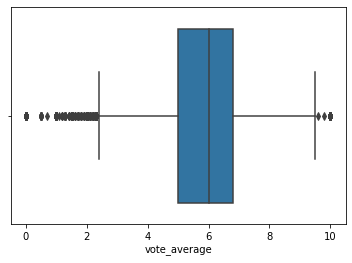

In [180]:
sns.boxplot(dataframe['vote_average'])

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

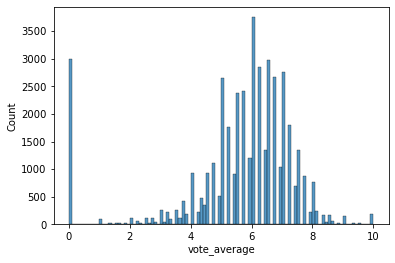

In [181]:
sns.histplot(dataframe['vote_average'])

<AxesSubplot:xlabel='runtime'>

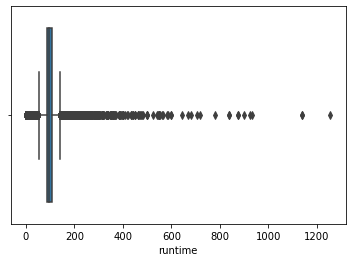

In [182]:
sns.boxplot(dataframe['runtime'])

<AxesSubplot:xlabel='runtime', ylabel='Count'>

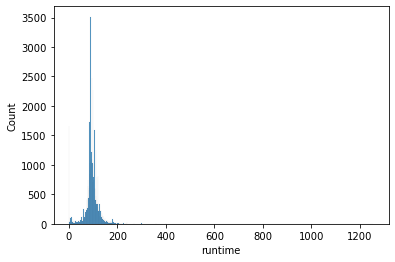

In [183]:
sns.histplot(dataframe['runtime'])

<AxesSubplot:xlabel='revenue'>

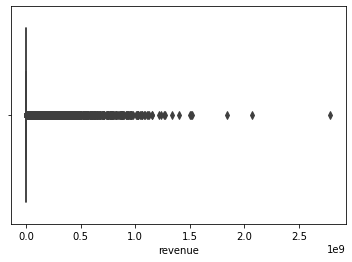

In [184]:
sns.boxplot(dataframe['revenue'])

<AxesSubplot:xlabel='revenue', ylabel='Count'>

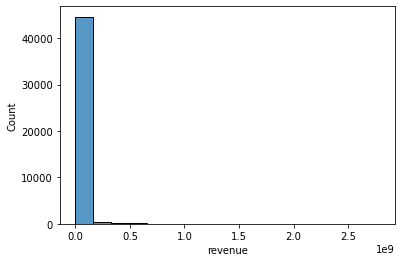

In [185]:
sns.histplot(dataframe['revenue'])

<AxesSubplot:xlabel='popularity'>

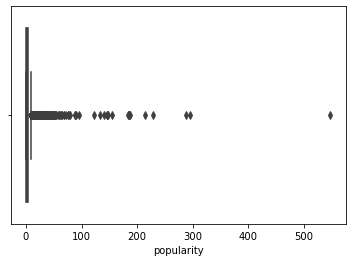

In [186]:
sns.boxplot(dataframe['popularity'])

<AxesSubplot:xlabel='popularity', ylabel='Count'>

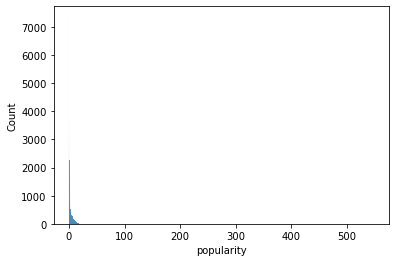

In [187]:
sns.histplot(dataframe['popularity'])

In [188]:
#runtime outliers
Q1=dataframe['runtime'].quantile(0.25)
Q3=dataframe['runtime'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

85.0
107.0
22.0
52.0 140.0


In [189]:
out_dataframe = dataframe[dataframe['runtime']< Upper_Whisker]
out_dataframe = dataframe[dataframe['runtime']>Lower_Whisker]

In [190]:
len(out_dataframe)

41693

In [191]:
#popularity outliers
Q1=dataframe['popularity'].quantile(0.25)
Q3=dataframe['popularity'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.38594775
3.67890225
3.2929545
-4.553484 8.618334


In [192]:
out_dataframe_pop = dataframe[dataframe['popularity']< Upper_Whisker]
out_dataframe_pop = dataframe[dataframe['popularity']>Lower_Whisker]

In [193]:
out_dataframe = out_dataframe[out_dataframe['popularity']< Upper_Whisker]
out_dataframe = out_dataframe[out_dataframe['popularity']>Lower_Whisker]

In [194]:
len(out_dataframe)

37484

In [195]:
len(out_dataframe_pop)

45460

In [196]:
#vote_average outliers
Q1=dataframe['vote_average'].quantile(0.25)
Q3=dataframe['vote_average'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

5.0
6.8
1.7999999999999998
2.3000000000000003 9.5


In [197]:
out_dataframe_vote_avg = dataframe[dataframe['vote_average']< Upper_Whisker]
out_dataframe_vote_avg = dataframe[dataframe['vote_average']>Lower_Whisker]

In [198]:
out_dataframe = out_dataframe[out_dataframe['vote_average']< Upper_Whisker]
out_dataframe = out_dataframe[out_dataframe['vote_average']>Lower_Whisker]

In [199]:
len(out_dataframe_vote_avg)

42049

In [200]:
len(out_dataframe)

34626

In [201]:
#revenue outliers
Q1=dataframe['revenue'].quantile(0.25)
Q3=dataframe['revenue'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
0.0
0.0
0.0 0.0


In [202]:
out_dataframe_rev = dataframe[dataframe['revenue']< Upper_Whisker]
out_dataframe_rev = dataframe[dataframe['revenue']>Lower_Whisker]

In [203]:
len(out_dataframe_rev)

7408

In [204]:
out_dataframe = out_dataframe[out_dataframe['revenue']< Upper_Whisker]
out_dataframe = out_dataframe[out_dataframe['revenue']>Lower_Whisker]

In [205]:
len(out_dataframe)

0

In [206]:
len(dataframe)

45463

In [207]:
len(metadata)

45463

# Normality test

In [208]:
from scipy.stats import shapiro
from numpy.random import seed
from numpy.random import poisson

#set seed (e.g. make this example reproducible)
seed(0)

#generate dataset of 100 values that follow a Poisson distribution with mean=5
data = dataframe.popularity.sample(n=5000)

In [209]:
st,pval=shapiro(data)
if pval<0.05:
    print('Data not normal')
else:
    print('Data normal')

Data not normal


In [210]:
data = dataframe.revenue.sample(n=5000)
st,pval=shapiro(data)
if pval<0.05:
    print('Data not normal')
else:
    print('Data normal')

Data not normal


In [211]:
data = dataframe.vote_average.sample(n=4999)
st,pval=shapiro(data)
if pval<0.05:
    print('Data not normal')
else:
    print('Data normal')

Data not normal


In [212]:
data = dataframe.runtime.sample(n=4999)
st,pval=shapiro(data)
if pval<0.05:
    print('Data not normal')
else:
    print('Data normal')

Data normal


<AxesSubplot:xlabel='runtime', ylabel='Count'>

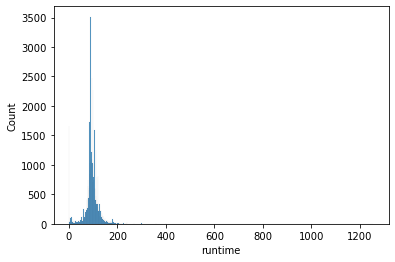

In [213]:
sns.histplot(dataframe.runtime)

# Data Visualization

Movies having the genre as Drama are maximum in number compared to others.

The second highest count will be the Comedy genre.

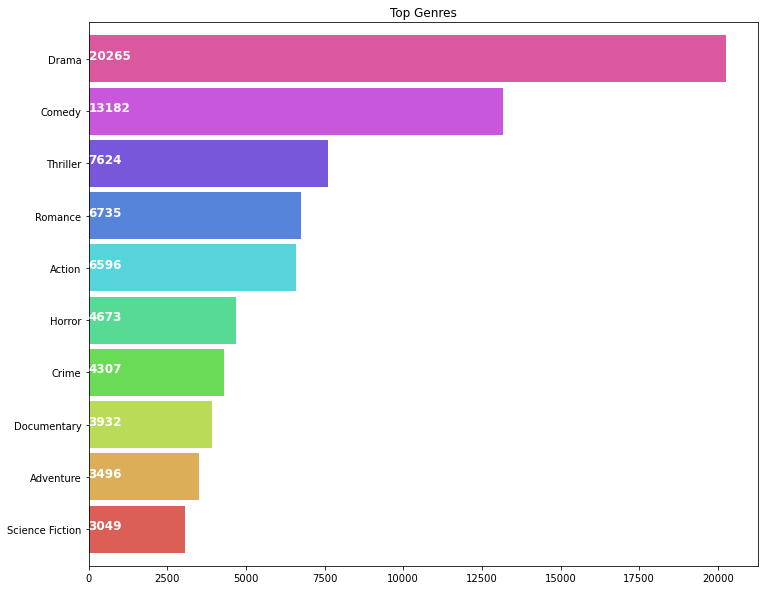

In [214]:
plt.subplots(figsize=(12,10))
list1 = []
for i in dataframe['genre_name']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

Relation between Runtime and Budget

<AxesSubplot:xlabel='runtime', ylabel='budget'>

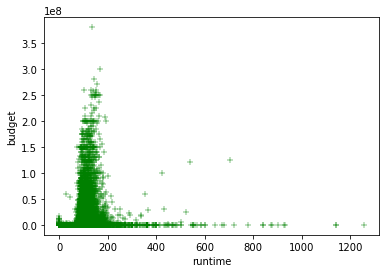

In [215]:
sns.scatterplot(
    data=metadata, x="runtime", y="budget",
    sizes=(20, 100), hue_norm=(0, 7), legend="full",color="green",marker="+",palette="deep")

Observations : 1. Runtime increases - Budget decreases                                                              2. 70 - 150 approx Runtime some falls under lower budget but                                             budget also it keeps increasing for some 
               3.There are more outliers for Runtime

Relation between Revenue and Budget

<AxesSubplot:xlabel='revenue', ylabel='budget'>

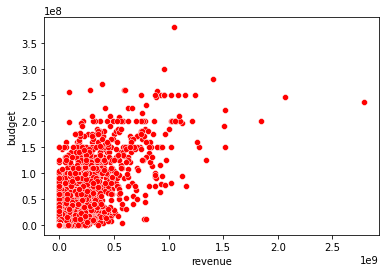

In [216]:
sns.scatterplot(
    data=metadata, x="revenue", y="budget",
    sizes=(20, 100), hue_norm=(0, 7), legend="full",color="Red",marker="o",palette="deep")

Observations : Low buget movies produces Low revenue

# coorelation Matrix 

In [217]:
dataframe_copy = dataframe.copy()
dataframe_copy.head(3)

,adult,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,genre_name,collection_name,production_companies_name,keywords,cast_name,crew_name,vote_average
0,False,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,"[Animation, Comedy, Family]",Toy Story Collection,['Pixar Animation Studios'],"[jealousy, toy, boy, friendship, friends, riva...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...",7.7
1,False,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,"[Adventure, Fantasy, Family]",nan,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[board game, disappearance, based on children'...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...",6.9
2,False,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,"[Romance, Comedy]",Grumpy Old Men Collection,"['Warner Bros.', 'Lancaster Gate']","[fishing, best friend, duringcreditsstinger, o...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...",6.5


In [218]:
dataframe_copy.columns

Index(['adult', 'id', 'original_language', 'original_title', 'overview',
       'popularity', 'release_date', 'revenue', 'runtime', 'status',
       'genre_name', 'collection_name', 'production_companies_name',
       'keywords', 'cast_name', 'crew_name', 'vote_average'],
      dtype='object')

In [219]:
dataframe_copy.original_language.value_counts()

en    32269
fr     2438
it     1529
ja     1350
de     1080
      ...  
ay        1
rw        1
cy        1
tg        1
si        1
Name: original_language, Length: 89, dtype: int64

In [220]:
new_encoded_values = pd.get_dummies(data=dataframe_copy, prefix=None, prefix_sep='_', dummy_na=False, columns=['adult','status'], sparse=False, drop_first=False, dtype=None)
new_encoded_values.head(2)

,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,genre_name,collection_name,...,crew_name,vote_average,adult_False,adult_True,status_Canceled,status_In Production,status_Planned,status_Post Production,status_Released,status_Rumored
0,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[Animation, Comedy, Family]",Toy Story Collection,...,"['John Lasseter', 'Joss Whedon', 'Andrew Stant...",7.7,1,0,0,0,0,0,1,0
1,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[Adventure, Fantasy, Family]",nan,...,"['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...",6.9,1,0,0,0,0,0,1,0


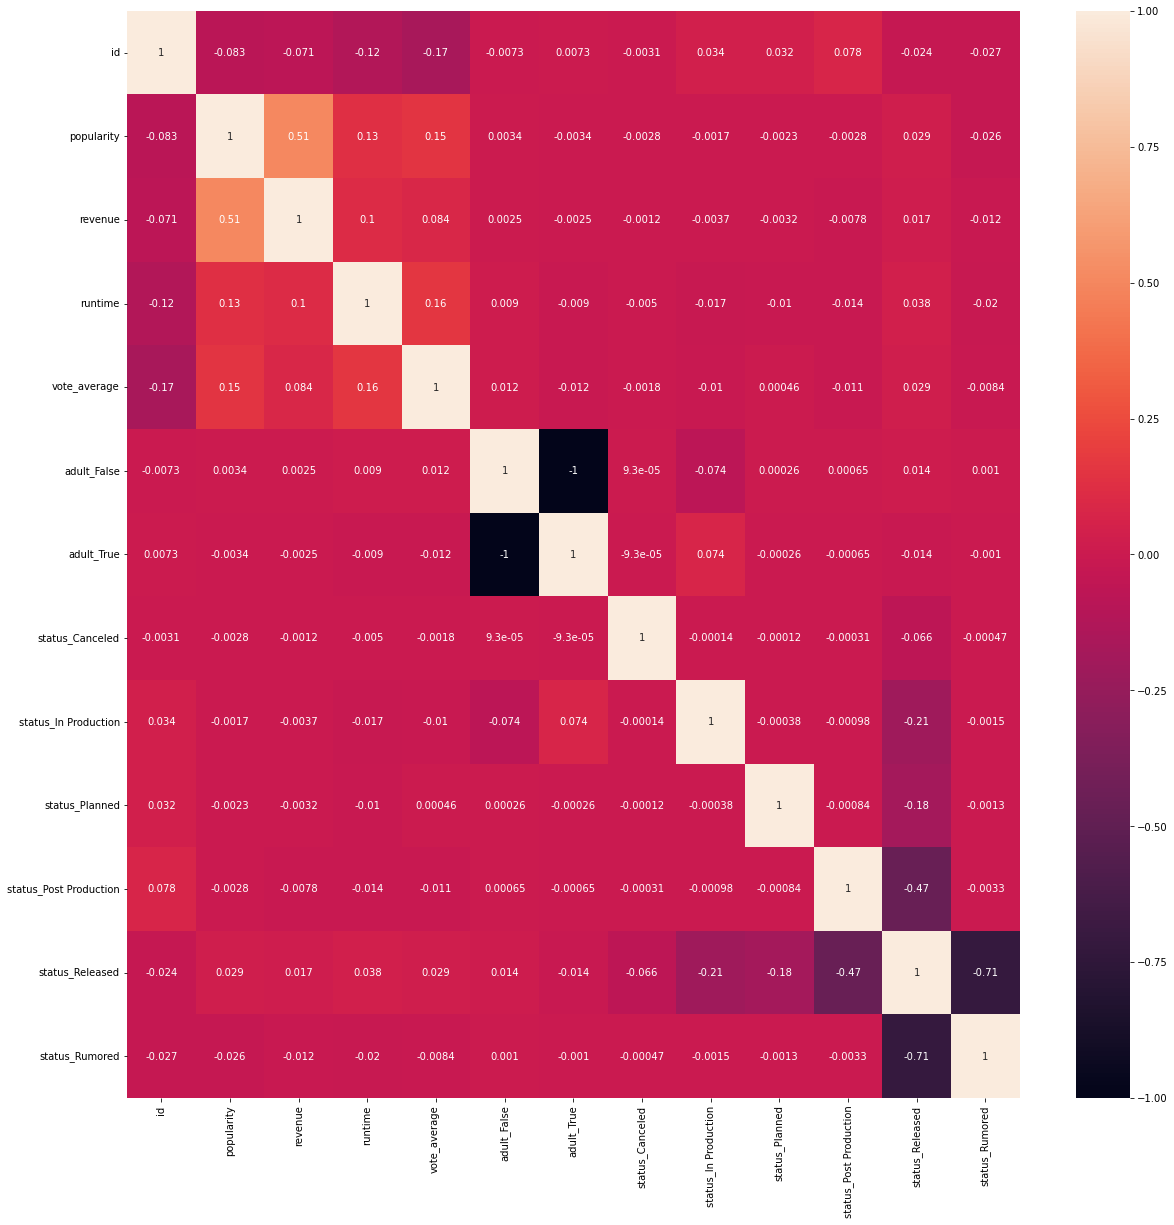

In [221]:
correlated = new_encoded_values.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlated,annot=True)
plt.show()
# write observations for categorical variables correlation based on eigen values

In [223]:
dataframe.head()

,adult,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,genre_name,collection_name,production_companies_name,keywords,cast_name,crew_name,vote_average
0,False,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,"[Animation, Comedy, Family]",Toy Story Collection,['Pixar Animation Studios'],"[jealousy, toy, boy, friendship, friends, riva...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...",7.7
1,False,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,"[Adventure, Fantasy, Family]",nan,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[board game, disappearance, based on children'...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...",6.9
2,False,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,"[Romance, Comedy]",Grumpy Old Men Collection,"['Warner Bros.', 'Lancaster Gate']","[fishing, best friend, duringcreditsstinger, o...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...",6.5
3,False,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,"[Comedy, Drama, Romance]",nan,['Twentieth Century Fox Film Corporation'],"[based on novel, interracial relationship, sin...","['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...",6.1
4,False,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,[Comedy],Father of the Bride Collection,"['Sandollar Productions', 'Touchstone Pictures']","[baby, midlife crisis, confidence, aging, daug...","['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...",5.7


In [225]:
dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45462
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   adult                      45463 non-null  object        
 1   id                         45463 non-null  int64         
 2   original_language          45452 non-null  object        
 3   original_title             45463 non-null  object        
 4   overview                   44509 non-null  object        
 5   popularity                 45460 non-null  float64       
 6   release_date               45376 non-null  datetime64[ns]
 7   revenue                    45460 non-null  float64       
 8   runtime                    45203 non-null  float64       
 9   status                     45379 non-null  object        
 10  genre_name                 45463 non-null  object        
 11  collection_name            45463 non-null  object        
 12  prod

# Visualization

In [227]:
dataframe_cat = dataframe_copy.select_dtypes(include='object')
dataframe_num = dataframe_copy.select_dtypes(include='number')

In [249]:
dataframe_cat.head()

,adult,original_language,original_title,overview,status,genre_name,collection_name,production_companies_name,keywords,cast_name,crew_name
0,False,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,"[Animation, Comedy, Family]",Toy Story Collection,['Pixar Animation Studios'],"[jealousy, toy, boy, friendship, friends, riva...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
1,False,en,Jumanji,When siblings Judy and Peter discover an encha...,Released,"[Adventure, Fantasy, Family]",nan,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[board game, disappearance, based on children'...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
2,False,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,Released,"[Romance, Comedy]",Grumpy Old Men Collection,"['Warner Bros.', 'Lancaster Gate']","[fishing, best friend, duringcreditsstinger, o...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark..."
3,False,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Released,"[Comedy, Drama, Romance]",nan,['Twentieth Century Fox Film Corporation'],"[based on novel, interracial relationship, sin...","['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas..."
4,False,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,Released,[Comedy],Father of the Bride Collection,"['Sandollar Productions', 'Touchstone Pictures']","[baby, midlife crisis, confidence, aging, daug...","['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye..."


In [263]:
dataframe_copy.isnull().sum()

adult                            0
id                               0
original_language               11
original_title                   0
overview                       954
popularity                       3
release_date                    87
revenue                          3
runtime                        260
status                          84
genre_name                       0
collection_name                  0
production_companies_name        0
keywords                     14353
cast_name                        1
crew_name                        1
vote_average                     3
dtype: int64

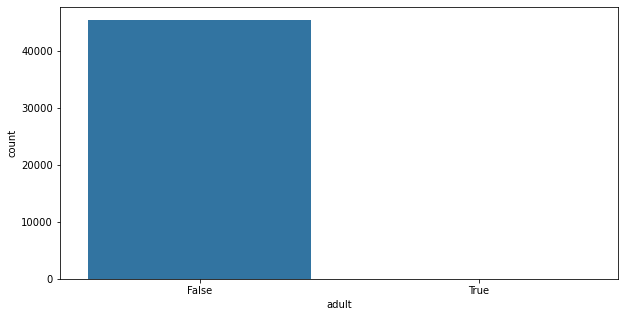

In [245]:
# For categorical column
sns.countplot(data=dataframe_cat,x='adult')
plt.show()

In [ ]:
# we can see that most the movie are not adult category

In [253]:
dataframe_cat['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [254]:
dataframe_cat['status'].value_counts()[0]/len(dataframe_cat['status'])

0.9901238369663242

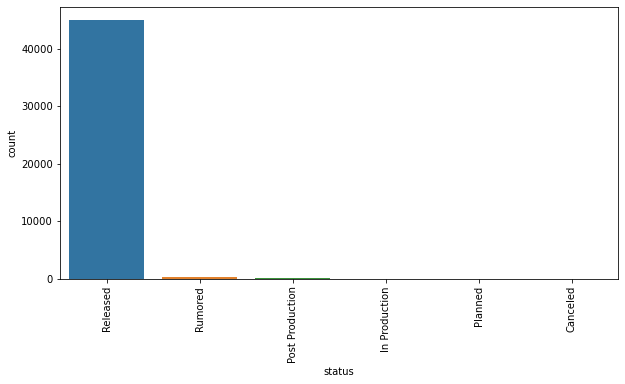

In [250]:
sns.countplot(data=dataframe_cat,x='status')

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Most of the movie almost 99% of total movies has released.

In [ ]:
# For Numerical column

In [298]:
from sklearn.preprocessing import StandardScaler

In [304]:
ss = StandardScaler()
x = ss.fit_transform(dataframe_num)
df_ss_num = pd.DataFrame(x,columns=dataframe_num.columns)
df_ss_num.head()

,id,popularity,revenue,runtime,vote_average
0,-0.955881,3.168087,5.632458,-0.341814,1.081903
1,-0.884904,2.346918,3.910802,0.257029,0.666145
2,-0.824812,1.463932,-0.174243,0.178919,0.458266
3,-0.684717,0.156197,1.091888,0.855872,0.250387
4,-0.858068,0.910195,1.016136,0.309102,0.042508


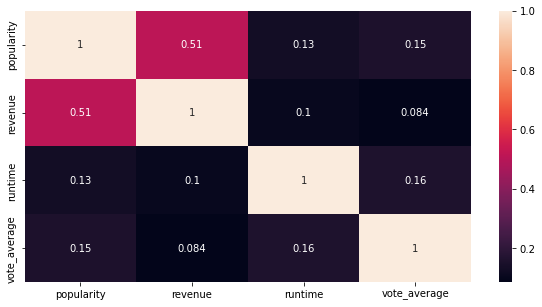

In [305]:
sns.heatmap(df_ss_num.iloc[:,1:].corr(),annot=True)
plt.show()

In [ ]:
# revenue and popularity have moderate positive correlation
# Rest of the features having very low positive correlation

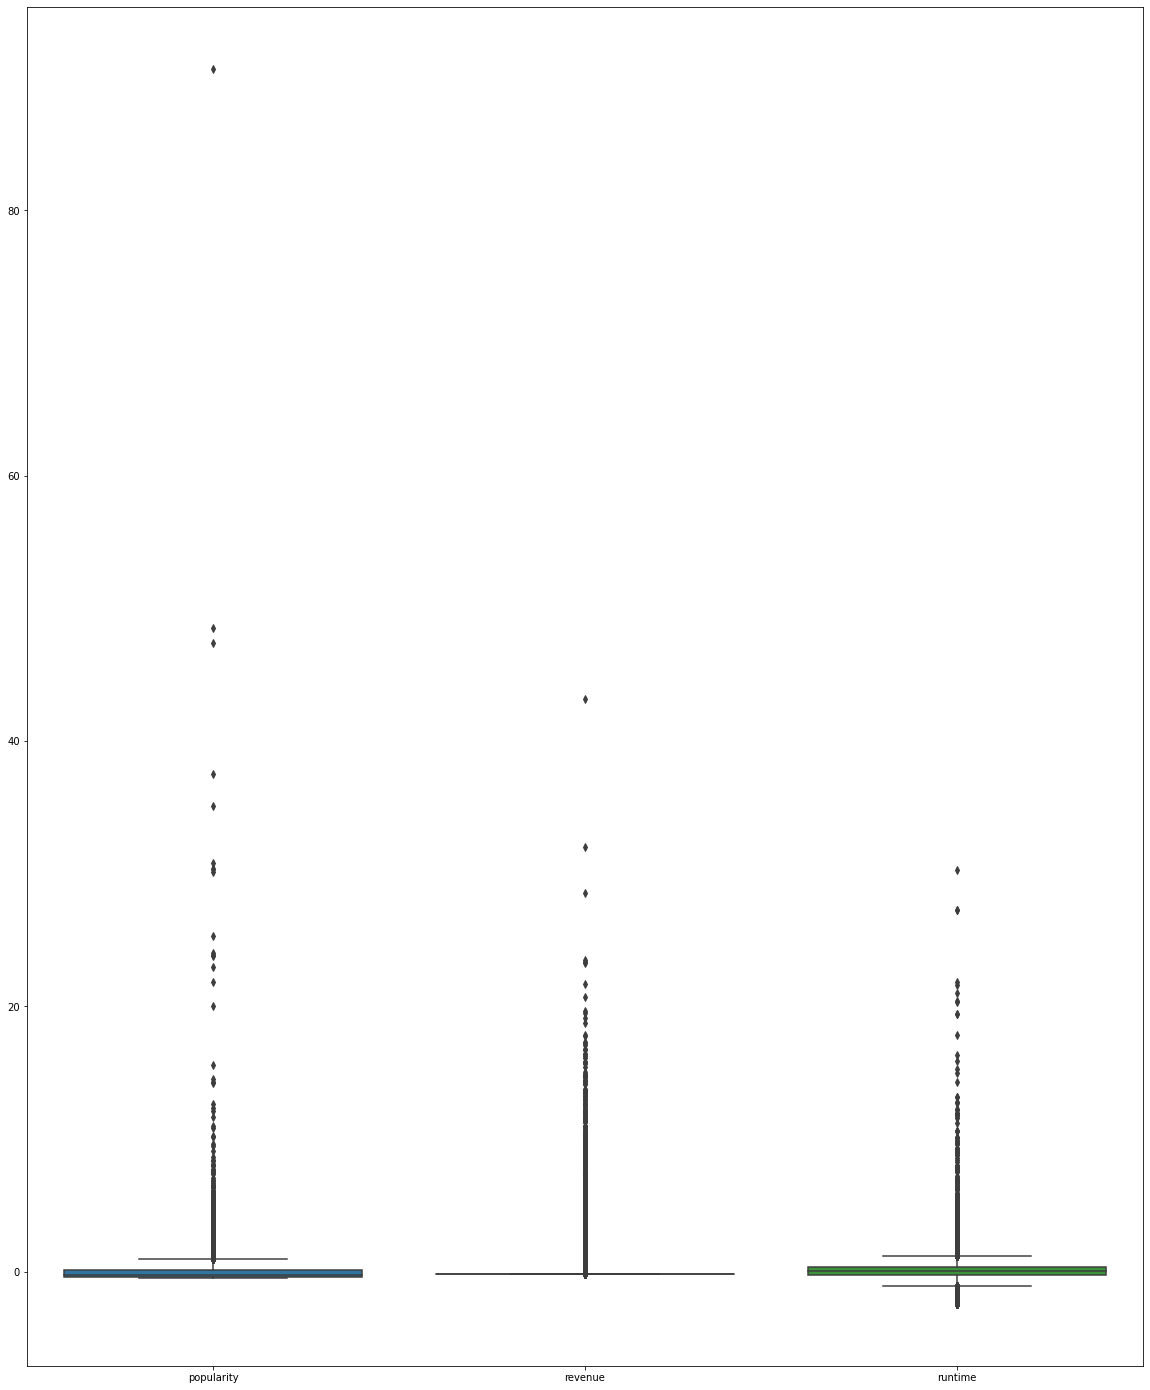

In [336]:
plt.figure(figsize=(20,25))
sns.boxplot(data=df_ss_num.iloc[:,1:4])
plt.show()

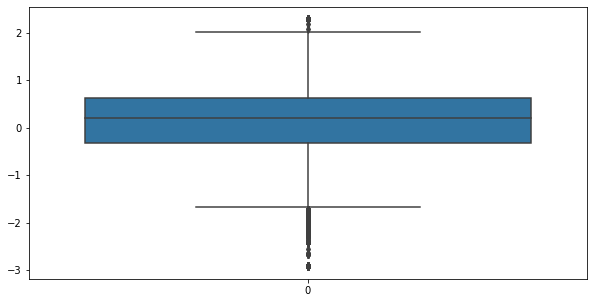

In [313]:
sns.boxplot(data=df_ss_num['vote_average'])
plt.show()

In [ ]:
# There are outliers for revenue,popularity  column on positive side
# There are outliers for runtime,vote_average on both on positive side and negative side.

# Connection

In [222]:
import mysql.connector

ModuleNotFoundError: No module named 'mysql'

In [ ]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="root",
  database="capstone"
)

print(mydb)

In [ ]:
query="SELECT * FROM df1"
df_mysql = pd.read_sql(query, con = mydb)

In [ ]:
df_mysql.head()

In [ ]:
df_mysql.columns

In [ ]:
df_mysql.to_csv('final_data.csv',index=False)

In [ ]:
len(df_mysql)